Importing lybraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Reading dataset

In [3]:
data = pd.read_csv('/content/StudentsPerformance.csv')

Cheking data

In [4]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
5,female,group B,high school,free/reduced,completed,23,44,36
6,female,group B,some high school,free/reduced,none,24,38,27
7,female,group D,associate's degree,free/reduced,none,26,31,38
8,female,group D,some high school,free/reduced,none,19,34,32
9,female,group C,high school,standard,none,29,29,30


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Q1 Find out how many male and female students are there

In [6]:
data_gender = data['gender'].value_counts().to_frame().reset_index()
data_gender.set_axis(['Gender','Count'],axis = 1, inplace = True)

In [7]:
print(data_gender)

   Gender  Count
0  female    518
1    male    482


([<matplotlib.patches.Wedge at 0x7f6cf19e2a50>,
 [Text(-0.12434082192596849, 2.196483407632021, 'female'),
  Text(0.12434082192596822, -2.196483407632021, 'male')])

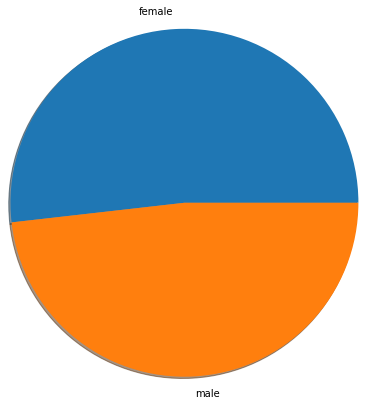

In [8]:
plt.pie(data_gender['Count'], labels= data_gender['Gender'] , radius = 2 , shadow = True)

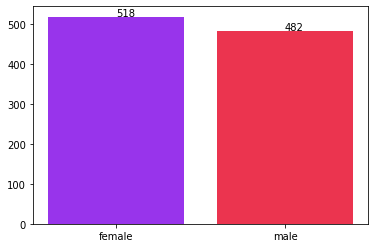

In [9]:
plt.bar(data_gender['Gender'],data_gender['Count'], color = ['#9834eb','#eb344f'])
for i,j in zip(data_gender['Gender'] , data_gender['Count']):
  plt.annotate(str(j),(i,j+2))

## Q2 What do you think about the students' parental level of education?


In [10]:
data['parental level of education'].value_counts(normalize = True)*100

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

From the above we can see that about 22.6% of the parentes has done some collge degree and about 22.2% of the parents has some associate's degree.

In [11]:
print(data['parental level of education'].mode())

0    some college
dtype: object


## Q3 Who Score the most on average for math, reading and witing based on gender

Comparing the mean

In [12]:
data_marks = data.groupby('gender')

In [13]:
data_marks.mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


From the above we can say that male score more than female more than average in math but female score more on an average than male in reading and writing.

gender
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

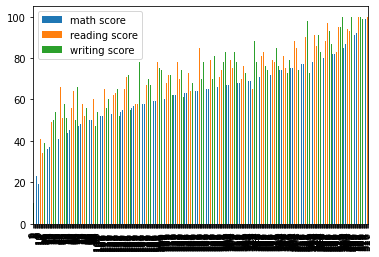

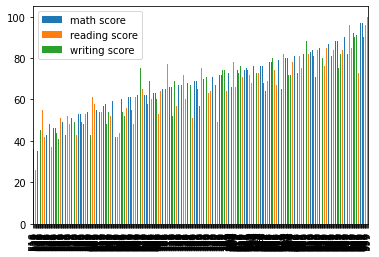

In [14]:
data_marks.plot(kind = 'bar')

In [15]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [16]:
data_marks.std()

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


female         AxesSubplot(0.1,0.15;0.363636x0.75)
male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

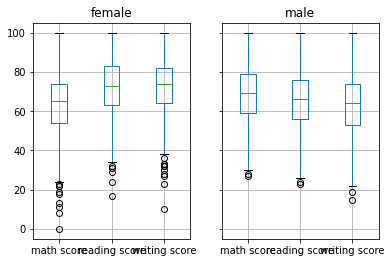

In [17]:
data_marks.boxplot()

In [18]:
data_marks.var()

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


## Q3. Who Score the most on average for math, reading and witing based on Test preparation course

In [19]:
data.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


Students those who have completed test preparation course gained more marks

completed         AxesSubplot(0.1,0.15;0.363636x0.75)
none         AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

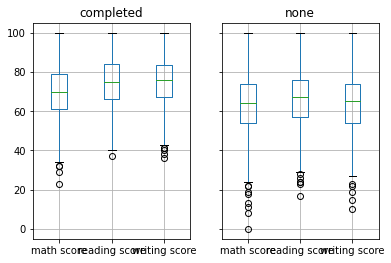

In [20]:
data.groupby('test preparation course').boxplot()

## Q4. What do you think about the scoring variation for math, reading and writing based on gender

gender
female    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
male      [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

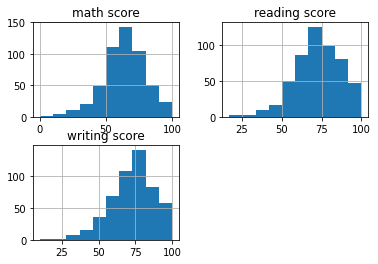

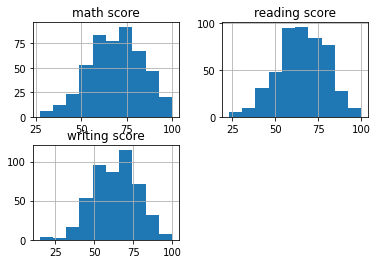

In [21]:
data.groupby('gender').hist()

In [22]:
data.groupby('gender').std()

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


Only for math score we can see a small amount of variation 

## Q4. What do you think about the scoring variation for math, reading and writing based on Test preparation course

test preparation course
completed    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
none         [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

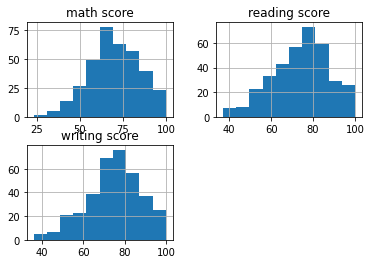

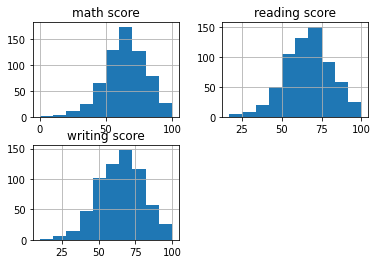

In [23]:
data.groupby('test preparation course').hist()

In [24]:
data.groupby('test preparation course').std()

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


## Q5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.


In [25]:
np.percentile(data['math score'],75)

77.0

Since the third quartile value is 77.0, the management can award bonus points to those stuents having maths score greater than or equal to 77.0 ( falling in the third quatie )


In [26]:
pd.qcut(data["math score"],q=4)

0      (-0.001, 57.0]
1      (-0.001, 57.0]
2      (-0.001, 57.0]
3      (-0.001, 57.0]
4      (-0.001, 57.0]
            ...      
995     (77.0, 100.0]
996     (77.0, 100.0]
997     (77.0, 100.0]
998     (77.0, 100.0]
999     (77.0, 100.0]
Name: math score, Length: 1000, dtype: category
Categories (4, interval[float64]): [(-0.001, 57.0] < (57.0, 66.0] < (66.0, 77.0] < (77.0, 100.0]]

If you are following the above approach, 77 would be excluded while calculating the eligible students for bonus . 

In [27]:
data[data['math score']>77]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
430,female,group A,some college,standard,completed,78,87,91
431,female,group B,bachelor's degree,free/reduced,none,78,79,76
432,female,group D,bachelor's degree,standard,none,78,82,79
433,female,group D,high school,standard,none,78,81,80
434,female,group D,bachelor's degree,free/reduced,none,78,90,93
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
